In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA Explore Data Analytics 

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.shape

(918, 12)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

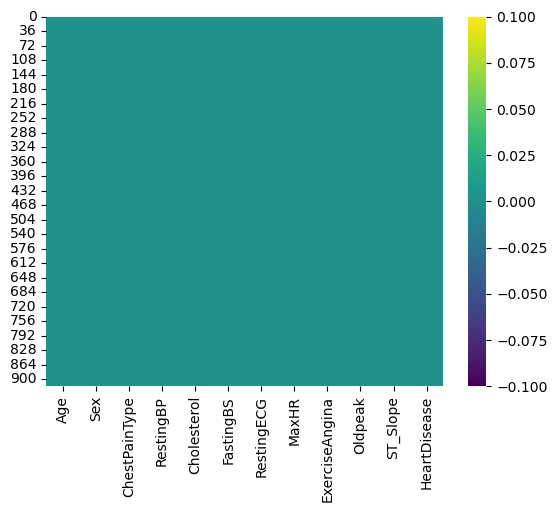

In [6]:
sns.heatmap(data.isnull(), cmap='viridis')

In [7]:
data.duplicated().sum()

0

## Analysis 

In [8]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

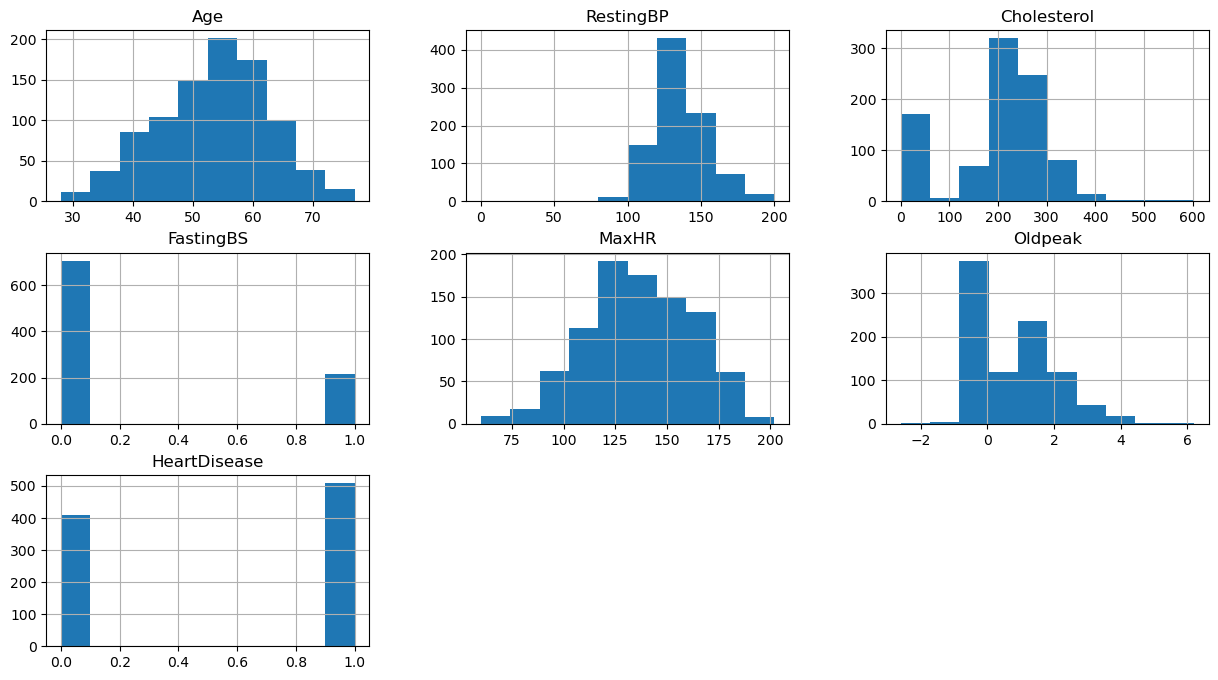

In [9]:
data.hist(figsize=(15,8))

In [10]:
corr = data.select_dtypes('number').corr()

<Axes: >

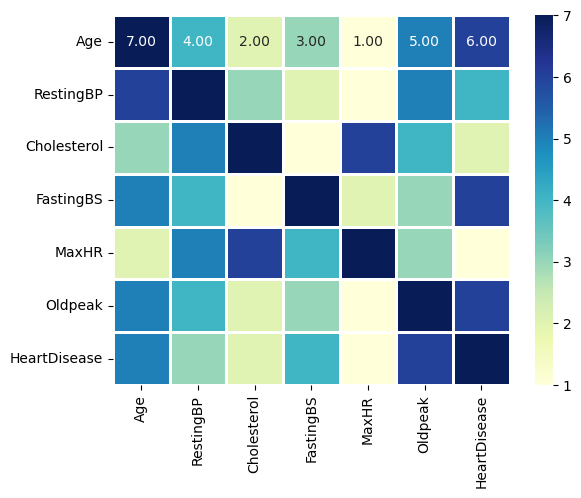

In [11]:
sns.heatmap(corr.rank(axis='columns'), annot=True, cmap='YlGnBu',fmt='.2f',linewidths=1)

## Processing Data 

In [12]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

In [13]:
obj = data.select_dtypes(include='object')
non_obj = data.select_dtypes(exclude='object')

In [14]:
# for i in range(0, obj.shape[1]):
#     obj.iloc[:,i] = lab.fit_transform(obj.iloc[:,i])
obj = obj.apply(lambda col: lab.fit_transform(col))

In [15]:
df = pd.concat([obj, non_obj], axis=1)

In [16]:
df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0


In [17]:
df.shape

(918, 12)

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
x= df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
def all (model):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)
    print(confusion_matrix(pre, y_test)) 
    print(classification_report(pre, y_test))

In [22]:
model1 = KNeighborsClassifier()

all (model1)

[[52 15]
 [38 79]]
              precision    recall  f1-score   support

           0       0.58      0.78      0.66        67
           1       0.84      0.68      0.75       117

    accuracy                           0.71       184
   macro avg       0.71      0.73      0.71       184
weighted avg       0.74      0.71      0.72       184



In [23]:
#model2  = 
all (DecisionTreeClassifier())

[[70 29]
 [20 65]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74        99
           1       0.69      0.76      0.73        85

    accuracy                           0.73       184
   macro avg       0.73      0.74      0.73       184
weighted avg       0.74      0.73      0.73       184



In [24]:
all (GaussianNB())

[[71 11]
 [19 83]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        82
           1       0.88      0.81      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [25]:
all (SVC())

[[61 23]
 [29 71]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        84
           1       0.76      0.71      0.73       100

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184



In [26]:
all (RandomForestClassifier())

[[73 11]
 [17 83]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        84
           1       0.88      0.83      0.86       100

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [27]:
all (GradientBoostingClassifier())

[[77 12]
 [13 82]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        89
           1       0.87      0.86      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



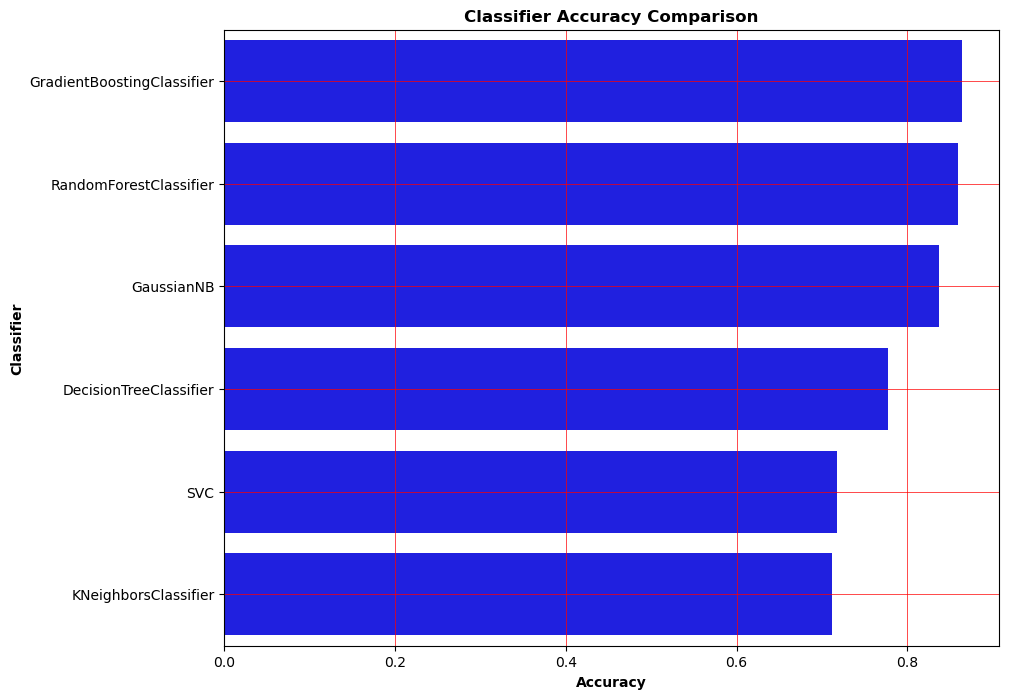

In [28]:
# Plotting all models in one barplot by accuracy

from sklearn.metrics import accuracy_score

models = [KNeighborsClassifier(), DecisionTreeClassifier(), GaussianNB(), SVC(), RandomForestClassifier(), GradientBoostingClassifier()]

# Initialize an empty list to store classifier names and their corresponding accuracies
classifier_accuracies = []

for model in models:
    # Train the model
    model.fit(x_train, y_train)
    # Make predictions
    pred = model.predict(x_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, pred)
    # Append classifier name and accuracy to the list
    classifier_accuracies.append({'Classifier': model.__class__.__name__, 'Accuracy': accuracy})

# Create a DataFrame from the list
log = pd.DataFrame(classifier_accuracies)

# Sort the DataFrame by accuracy in descending order
log = log.sort_values(by='Accuracy', ascending=False)

# Plot the results

plt.figure(figsize=(10, 8))
sns.barplot(y='Classifier', x='Accuracy', data=log, color='b')
plt.xlabel('Accuracy', fontweight='bold')
plt.ylabel('Classifier', fontweight='bold')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy Comparison', fontweight='bold')
plt.show()



In [29]:

# using GridSearchCV as additional task
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
test_score_best = best_model.score(x_test, y_test)
print("Best Model Test Score:", test_score_best)

Best Hyperparameters: {'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 100}
Best Model Test Score: 0.5756793382384939
